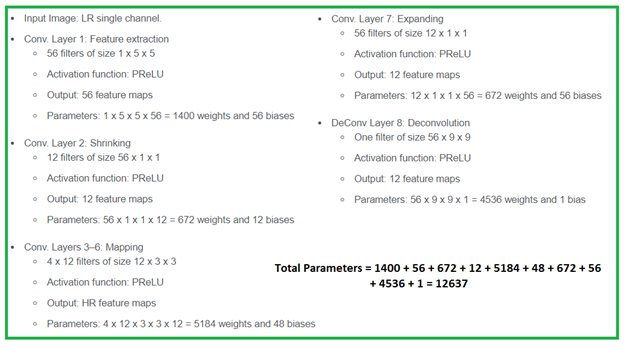

In [1]:
from IPython.display import Image
Image('1.png')

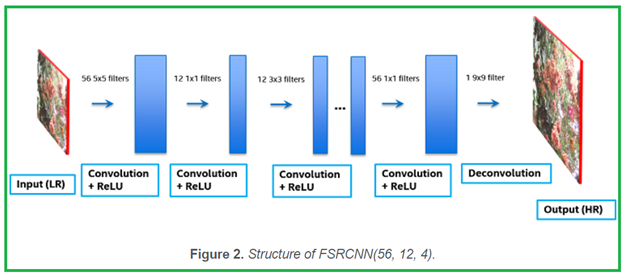

In [2]:
from IPython.display import Image
Image('2.png')

# METHOD 1 OF FSRCNN

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import numpy as np
import h5py

In [4]:
model = Sequential()
model.add(Conv2D(56, (5,5), input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Conv2D(12, (1,1)))
model.add(Activation('relu'))
model.add(Conv2D(12, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(12, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(12, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(12, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(56, (1,1)))
model.add(Activation('relu'))
model.add(Conv2D(1, (9,9)))
model.add(Activation('relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 56)        1456      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 56)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 12)        684       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 12)        1308      
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 12)        1308      
__________

# METHOD 2 OF FSRCNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import numpy as np
import h5py

In [6]:
#ACTUALLY WE REPLACE TWO PARAMETERS ONE IS RELU WITH PRELU
#OTHER IS LAST Conv2D TO DECONV, HERE JUST PARAMETERS VERIFICATION
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation ='relu',padding='same'),
    Conv2D(12, kernel_size=(1,1), activation='relu',padding='same'),
    
    Conv2D(12, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(12, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(12, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(12, kernel_size=(3,3), activation='relu',padding='same'),
    
    Conv2D(56, kernel_size=(1,1), activation='relu',padding='same'),
    Conv2D(1, kernel_size=(9,9), activation='relu',padding='same'),
    ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 56)        728       
__________

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

In [8]:
#HERE WE USE THE ACTIVATION FUNCTION = PRELU
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),#Conv:Layer-1
    Conv2D(12, kernel_size=(1,1), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                        #Conv:Layer-2
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                         #Conv:Layer-3
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                         #Conv:Layer-4
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                         #Conv:Layer-5
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                         #Conv:Layer-6
    Conv2D(56, kernel_size=(1,1), activation=keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),padding='same'),                         #Conv:Layer-7
    keras.layers.Conv2DTranspose(1, 9, strides=(1,1), padding='same', data_format=None,      #Decon:Layer-8 
                    activation=keras.layers.Softmax(axis=-1),use_bias=True, kernel_initializer='glorot_uniform', 
                    bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
     ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 56)        728       
__________

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as Softmax) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [9]:
#HERE WE USE THE ACTIVATION FUNCTION   =  LEAKY RELU
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation = keras.layers.LeakyReLU(alpha=0.3),
           padding='same'),                                                                     #Conv:Layer-1
    Conv2D(12, kernel_size=(1,1), activation=keras.layers.LeakyReLU(alpha=0.3),padding='same'), #Conv:Layer-2
    Conv2D(12, kernel_size=(3,3), activation= keras.layers.LeakyReLU(alpha=0.3),padding='same'),#Conv:Layer-3
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.LeakyReLU(alpha=0.3),padding='same'), #Conv:Layer-4
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.LeakyReLU(alpha=0.3),padding='same'), #Conv:Layer-5
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.LeakyReLU(alpha=0.3),padding='same'), #Conv:Layer-6
    Conv2D(56, kernel_size=(1,1), activation=keras.layers.LeakyReLU(alpha=0.3),padding='same'), #Conv:Layer-7
    keras.layers.Conv2DTranspose(1, 9, strides=(1,1), padding='same', data_format=None,         #Decon:Layer-8 
                    activation=keras.layers.LeakyReLU(alpha=0.3),use_bias=True, kernel_initializer='glorot_uniform', 
                    bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
     ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 56)        728       
__________

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [10]:
#HERE WE USE THE ACTIVATION FUNCTION   =  EXPONENETIAL LINEAR UNIT (ELU)
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation = keras.layers.ELU(alpha=1.0),padding='same'),#Conv:Layer-1
    Conv2D(12, kernel_size=(1,1), activation=keras.layers.ELU(alpha=1.0),padding='same'),                        #Conv:Layer-2
    Conv2D(12, kernel_size=(3,3), activation= keras.layers.ELU(alpha=1.0),padding='same'),                         #Conv:Layer-3
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ELU(alpha=1.0),padding='same'),                         #Conv:Layer-4
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ELU(alpha=1.0),padding='same'),                         #Conv:Layer-5
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ELU(alpha=1.0),padding='same'),                         #Conv:Layer-6
    Conv2D(56, kernel_size=(1,1), activation=keras.layers.ELU(alpha=1.0),padding='same'),                         #Conv:Layer-7
    keras.layers.Conv2DTranspose(1, 9, strides=(1,1), padding='same', data_format=None,      #Decon:Layer-8 
                    activation=keras.layers.ELU(alpha=1.0),use_bias=True, kernel_initializer='glorot_uniform', 
                    bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
     ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 56)        728       
__________

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [11]:
#HERE WE USE THE ACTIVATION FUNCTION   = THRESHOLD RELU
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation = keras.layers.ThresholdedReLU(theta=1.0),padding='same'),#Conv:Layer-1
    Conv2D(12, kernel_size=(1,1), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                        #Conv:Layer-2
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                         #Conv:Layer-3
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                         #Conv:Layer-4
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                         #Conv:Layer-5
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                         #Conv:Layer-6
    Conv2D(56, kernel_size=(1,1), activation=keras.layers.ThresholdedReLU(theta=1.0),padding='same'),                         #Conv:Layer-7
    keras.layers.Conv2DTranspose(1, 9, strides=(1,1), padding='same', data_format=None,      #Decon:Layer-8 
                    activation=keras.layers.ThresholdedReLU(theta=1.0),use_bias=True, kernel_initializer='glorot_uniform', 
                    bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
     ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 56)        728       
__________

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as ThresholdedReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [12]:
#HERE WE USE THE ACTIVATION FUNCTION   =  SOFTMAX FUNCTION
model1 = Sequential([
    Conv2D(56, kernel_size=(5,5), input_shape=(32,32,1), activation = keras.layers.Softmax(axis=-1),padding='same'),#Conv:Layer-1
    Conv2D(12, kernel_size=(1,1), activation=keras.layers.Softmax(axis=-1),padding='same'),                        #Conv:Layer-2
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.Softmax(axis=-1),padding='same'),                         #Conv:Layer-3
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.Softmax(axis=-1),padding='same'),                         #Conv:Layer-4
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.Softmax(axis=-1),padding='same'),                         #Conv:Layer-5
    Conv2D(12, kernel_size=(3,3), activation=keras.layers.Softmax(axis=-1),padding='same'),                         #Conv:Layer-6
    Conv2D(56, kernel_size=(1,1), activation=keras.layers.Softmax(axis=-1),padding='same'),                         #Conv:Layer-7
    keras.layers.Conv2DTranspose(1, 9, strides=(1,1), padding='same', data_format=None,      #Decon:Layer-8 
                    activation=keras.layers.Softmax(axis=-1),use_bias=True, kernel_initializer='glorot_uniform', 
                    bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
     ])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 56)        1456      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 12)        684       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 12)        1308      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 56)        728       
__________

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as Softmax) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [13]:
#ADD THE BATCH NORMALIZATIO IN FSRCNN NETWORK
model = Sequential()
model.add(Conv2D(56, (5,5), input_shape=(32,32,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(12, (1,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(12, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(12, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(12, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(12, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(56, (1,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(1, (9,9)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 56)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 56)        224       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 56)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 12)        684       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 12)        48        
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 12)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 26, 26, 12)        1308      
__________